In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn import * 

In [3]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
target = "Species"
features = ["SepalLengthCm", "PetalLengthCm"]

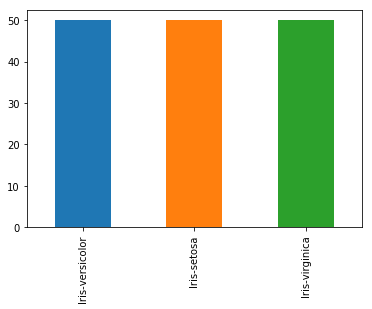

In [5]:
df[target].value_counts().plot.bar()

In [6]:
df[target].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

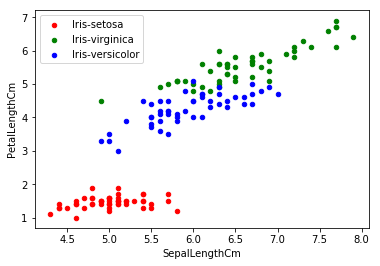

In [7]:
fig, ax = plt.subplots()
df.query("Species == 'Iris-setosa'").plot.scatter(features[0], features[1],
                                        color = "red", ax = ax, label = 'Iris-setosa')
df.query("Species == 'Iris-virginica'").plot.scatter(features[0], features[1], 
                                        color = "green", ax = ax, label = 'Iris-virginica')
df.query("Species == 'Iris-versicolor'").plot.scatter(features[0], features[1],
                                        color = "blue", ax = ax, label = "Iris-versicolor")

Accuracy:  1.0


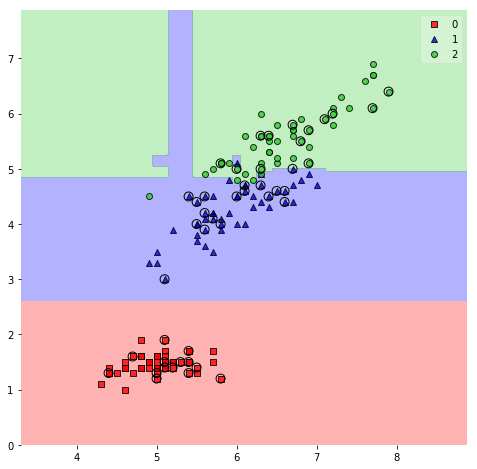

In [10]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Species)
X = df[features]

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth = 6))
])

pipe.fit(X_train, y_train)
print("Accuracy: ", pipe.score(X_test, y_test))
plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight=X_test)